In [1]:
import torchaudio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchaudio.transforms import MelSpectrogram

from loader import collate_function

Dataset Size: 43873

In [2]:
dataset = torchaudio.datasets.VCTK_092("./", download=True)
len(dataset)

43873

Check whether it is mono: yes

In [ ]:
s = set()
for i in range(len(dataset)):
    waveform, _, _, _, _ = dataset[i]
    s.add(waveform.shape[0])

print(s)

Data content

(waveform tensor, sample rate, transcript, speaker id, utterance id)

In [3]:
waveform, sr, ts, sid, uid = dataset[200]
print(waveform)
print(sr)
print(ts)
print(sid)
print(uid)

tensor([[ 0.0035,  0.0032,  0.0033,  ..., -0.0013, -0.0015, -0.0007]])
48000
Funding for the science centre has come from a number of sources.

p225
322


Waveform shape:

(Sound channel, timestep)

In [4]:
print(waveform.shape)

torch.Size([1, 211676])


Sound length = timestep / sample rate

In [5]:
print(waveform.shape[1] / sr)

4.409916666666667


Melspectrogram shape # (Sound channel, n_mels, time)

In [7]:
torchaudio.transforms.AmplitudeToDB()(MelSpectrogram(
    sample_rate=sr,
    n_mels=32,
)(waveform)).shape

torch.Size([1, 32, 1059])

In [18]:
# fixed_length = 794730
# fixed_length = 799800
# fixed_length = 799999
fixed_length = 819100

train_data_loader = DataLoader(
    dataset,
    batch_size=2,
    collate_fn=lambda batch: collate_function(batch, fixed_length=fixed_length),
    shuffle=True,
)

torch.Size([2, 1, 32, 4096])
tensor([48000, 48000])
torch.Size([2, 1, 32, 4096])
tensor([48000, 48000])
torch.Size([2, 1, 32, 4096])
tensor([48000, 48000])
torch.Size([2, 1, 32, 4096])
tensor([48000, 48000])
torch.Size([2, 1, 32, 4096])
tensor([48000, 48000])


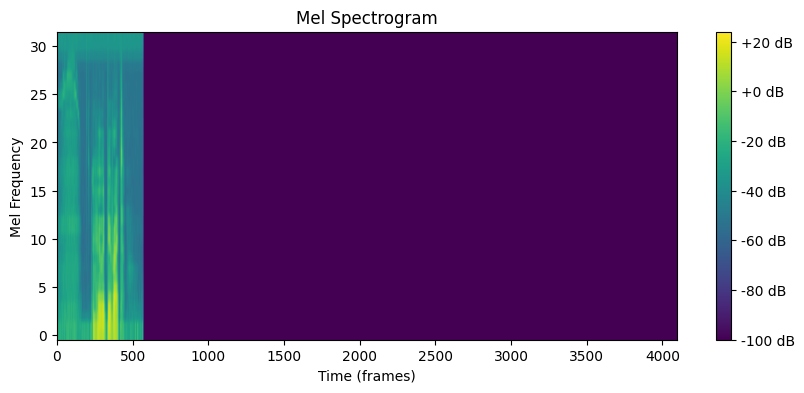

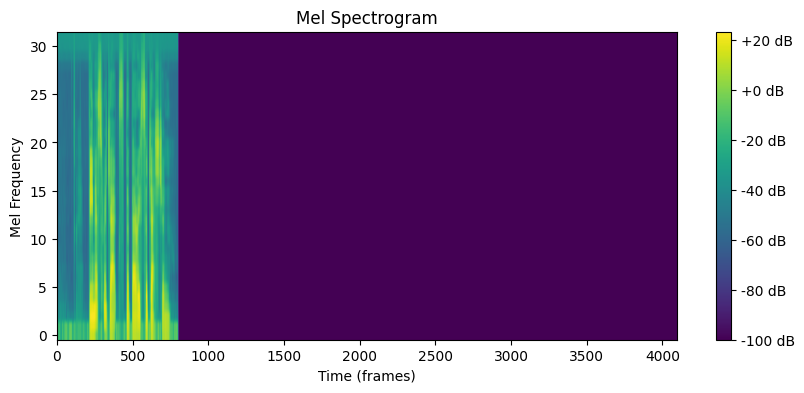

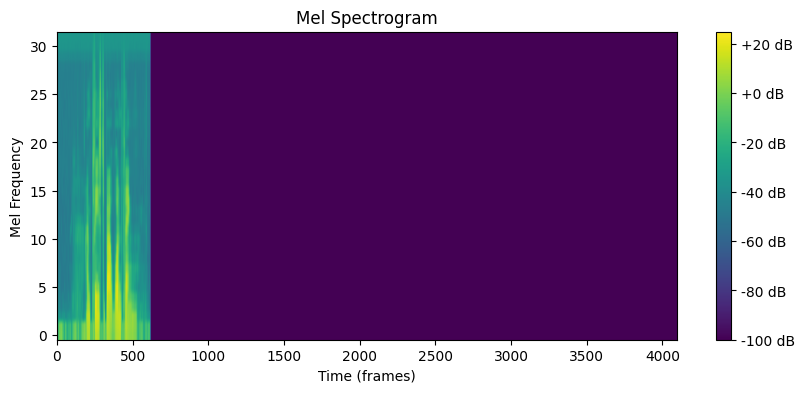

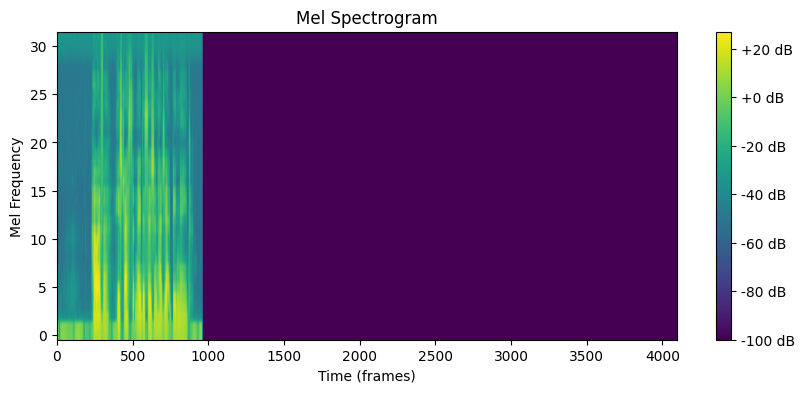

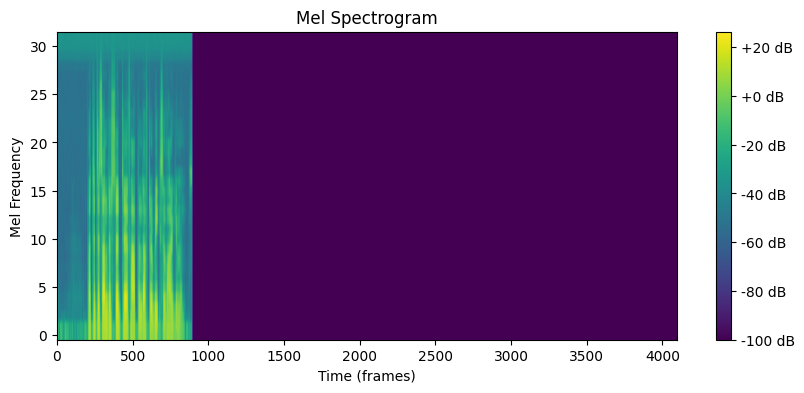

In [19]:
i = 0

for data in train_data_loader:
    print(data[0].shape)
    print(data[1])
    plt.figure(figsize=(10, 4))
    plt.imshow(data[0][0][0].numpy(), aspect="auto", origin="lower", cmap="viridis")
    plt.colorbar(format="%+2.0f dB")
    plt.xlabel("Time (frames)")
    plt.ylabel("Mel Frequency")
    plt.title("Mel Spectrogram")

    i += 1
    if i == 5:
        break

plt.show()
